In [11]:
from multiprocessing import Pool
import os.path as osp
from general_tools.in_out.basics import files_in_subdirs

from geo_tool import Point_Cloud
from general_tools.in_out.basics import create_dir
from geo_tool.in_out.soup import load_crude_point_cloud

%matplotlib inline

In [3]:
from external_tools.binvox_rw.binvox_rw import read_as_3d_array

with open('/orions4-zfs/projects/optas/Git_Repos/external_tools/binvox_rw/chair.binvox', 'rb') as f:
    model = read_as_3d_array(f)

In [15]:

from geo_tool import Point_Cloud
import numpy as np

x, y, z = np.where(model.data)
points = np.vstack((x, y, z)).T
pc = Point_Cloud(points=points)


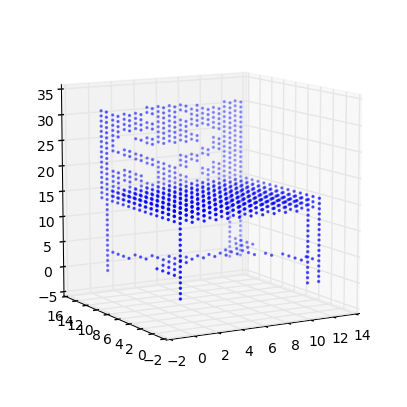

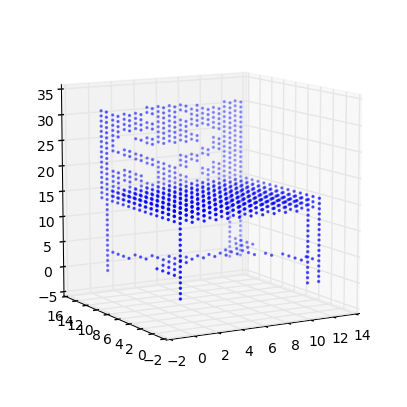

In [16]:
pc.plot(in_u_sphere=False)

In [2]:
n_threads = 32
n_pc_points = 2048

top_data_dir = '/orions4-zfs/projects/optas/DATA'
# top_in_folder = osp.join(top_data_dir, 'Point_Clouds/Shape_Net/Core/from_manifold_meshes/farthest_point_sampled/', str(n_pc_points))
top_in_folder = osp.join(top_data_dir, 'Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere/', str(n_pc_points), '03001627')
# top_out_folder = osp.join(top_data_dir, 'Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere/', str(n_pc_points))
top_out_folder = osp.join(top_data_dir, 'Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere_fiedler_sorted/', str(n_pc_points))

all_in_files = [f for f in files_in_subdirs(top_in_folder, '.ply')]
print len(all_in_files)

6778


In [68]:
# top_out_folder = osp.join(top_data_dir, 'Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere_fiedler_sorted/', str(n_pc_points))
# all_out_files = [f for f in files_in_subdirs(top_out_folder, '.ply')]
print len(all_out_files)

6771


In [3]:
create_dir('/orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere_fiedler_sorted/2048/03001627/')

'/orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere_fiedler_sorted/2048/03001627/'

In [111]:
# def fps_sampled_loader(in_f, save_dir=None):
#     ''' Loads pc's created with Matlab\'s code and FPS sampling.
#     '''
#     pc = load_crude_point_cloud(in_f)
#     pc = Point_Cloud(pc).permute_points([0, 2, 1]).points
#     syn_id = in_f.split('/')[-3]
#     model_name = in_f.split('/')[-2]

#     pc = Point_Cloud(pc)
#     pc.center_axis()
#     pc.center_in_unit_sphere()
#     pc, _ = pc.lex_sort()
#     if save_dir is not None:
#         out_dir = osp.join(save_dir, syn_id)
#         create_dir(out_dir)
#         out_file = osp.join(out_dir, model_name)
#         pc.save_as_ply(out_file)

#     return pc, model_name, syn_id

In [122]:
# fps_sampled_loader(all_in_files[159], top_out_folder)[0].plot()

In [29]:
pool = Pool(n_threads)
print 'Starting a pool with %d workers.' % (n_threads, )

for in_f in all_in_files:
    pool.apply_async(save_fiedler_sorted_version, (in_f, ))

pool.close()
pool.join()

Starting a pool with 32 workers.


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main_

FAILED /orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere/2048/03001627/b19f85fcd46f456bd5cba62773b8025b.ply


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater


FAILED /orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere/2048/03001627/185bcb9bcec174c9492d9da2668ec34c.ply


/orions4-zfs/projects/optas/Git_Repos/geo_tool/fundamentals/graph.py:108: RuntimeWarning: divide by zero encountered in divide
  total_weight = (1 / np.sqrt(total_weight)).squeeze()


FAILED /orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere/2048/03001627/8da327a8eea887fd492d9da2668ec34c.ply
FAILED /orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere/2048/03001627/cc8066a5107a2bf5926f2c1927eee8ee.ply
FAILED /orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere/2048/03001627/8a948db5f12d02af492d9da2668ec34c.ply
FAILED /orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere/2048/03001627/6fde09bdd613f6e6492d9da2668ec34c.ply
FAILED /orions4-zfs/projects/optas/DATA/Point_Clouds/Shape_Net/Core/from_manifold_meshes/fps_sampled_in_u_sphere/2048/03001627/f1f670ac53799c18492d9da2668ec34c.ply


In [ ]:
all_produced_files = [f for f in files_in_subdirs(top_out_folder, '.ply')]
print len(all_produced_files)

In [51]:
all_produced_files = [f for f in files_in_subdirs(top_out_folder, '.ply')]
print len(all_produced_files)

57398


In [20]:
from scipy.io import loadmat
import os.path as osp
import numpy as np
from geo_tool import Point_Cloud

In [53]:
n_pcs = 1000
top_in_dir = '/orions3-zfs/projects/optas/Matlab_Projects/converting_Wu_data_to_pc/samples/gun'
top_out_dir = '/orions4-zfs/projects/optas/DATA/OUT/iclr/synthetic_samples/mit_wu_isosurface_extracted/'
n_pc_points = 2048
pcs = np.zeros(shape=(n_pcs, n_pc_points, 3))
pcs = []
for i in range(1, n_pcs + 1):
    in_f = osp.join(top_in_dir, '%.4d.mat' % (i,) )
#     pcs[i-1] = loadmat(in_f)['samples'][:n_pc_points,:]
    pc = loadmat(in_f)['samples'][:n_pc_points,:]
    if np.all(pc==0):
        continue
    else:
        pcs.append(pc)
pcs = np.array(pcs)

In [54]:
print pcs.shape

(194, 2048, 3)


In [55]:
out_f = osp.join(top_out_dir, 'rifle')
np.savez(out_f, pcs)